In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Support Vector Regressor (SVR)

Support Vector Regressor adalah varian dari SVM yang digunakan untuk prediksi nilai numerik. Berbeda dari Linear Regression yang meminimalkan error rata-rata, SVR mencoba mencari fungsi yang berada dalam batas toleransi tertentu (margin of tolerance). Dengan menggunakan kernel seperti RBF (Radial Basis Function), SVR mampu menangkap hubungan non-linear antar fitur. Kelebihannya adalah stabil dan efektif pada data dengan pola kompleks, meskipun lebih lambat dibanding Linear Regression.

In [25]:
df = pd.read_csv("enhanced_anxiety_dataset.csv")

# ==============================
# 3. Ubah Kolom Target Menjadi Kategorikal
# ==============================
def categorize_anxiety(level):
    if level <= 3:
        return "Low"
    elif level <= 7:
        return "Medium"
    else:
        return "High"

df["Anxiety_Category"] = df["Anxiety Level (1-10)"].apply(categorize_anxiety)

# ==============================
# 4. Pisahkan fitur dan target
# ==============================
X = df.drop(columns=["Anxiety Level (1-10)", "Anxiety_Category"])
y = df["Anxiety_Category"]

# ==============================
# 5. Encoding kolom kategorikal
# ==============================
# Ubah kolom object menjadi kolom numerik (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# ==============================
# 6. Split Data Training dan Testing
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 7. Normalisasi Data (Standarisasi)
# ==============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================
# 8. Model Support Vector Classifier
# ==============================
svc_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svc_model.fit(X_train, y_train)

# ==============================
# 9. Evaluasi Model
# ==============================
y_pred = svc_model.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

Akurasi Model: 0.8004545454545454

=== Classification Report ===
              precision    recall  f1-score   support

        High       0.99      0.99      0.99       203
         Low       0.80      0.78      0.79      1040
      Medium       0.76      0.79      0.77       957

    accuracy                           0.80      2200
   macro avg       0.85      0.85      0.85      2200
weighted avg       0.80      0.80      0.80      2200


=== Confusion Matrix ===
[[201   0   2]
 [  0 808 232]
 [  3 202 752]]


Visualisasi Hasil Prediksi SVM (Scatter Plot)

Scatter plot digunakan untuk menampilkan hasil prediksi model SVM setelah dilakukan reduksi dimensi dengan PCA menjadi dua komponen utama (PC1 dan PC2).
Plot pertama menunjukkan distribusi data berdasarkan label aktual, plot kedua berdasarkan hasil prediksi model, dan plot ketiga membandingkan prediksi benar (hijau) serta salah (merah).
Visualisasi ini membantu memahami bagaimana model memisahkan kelas Low, Medium, dan High pada data uji.

/tmp/ipython-input-4211393507.py:24: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


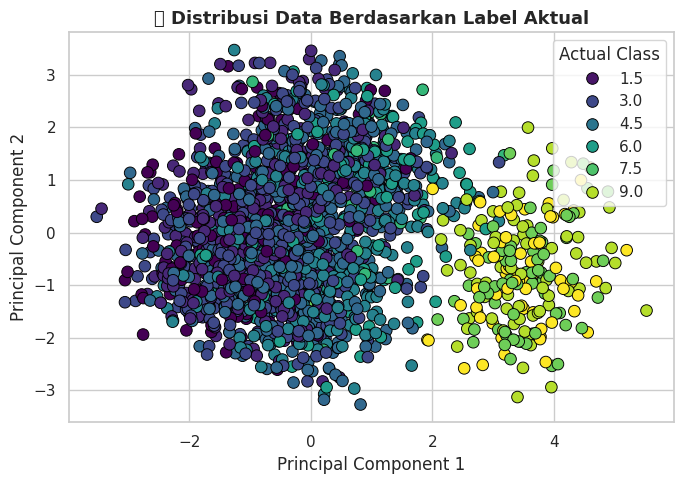

/tmp/ipython-input-4211393507.py:39: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


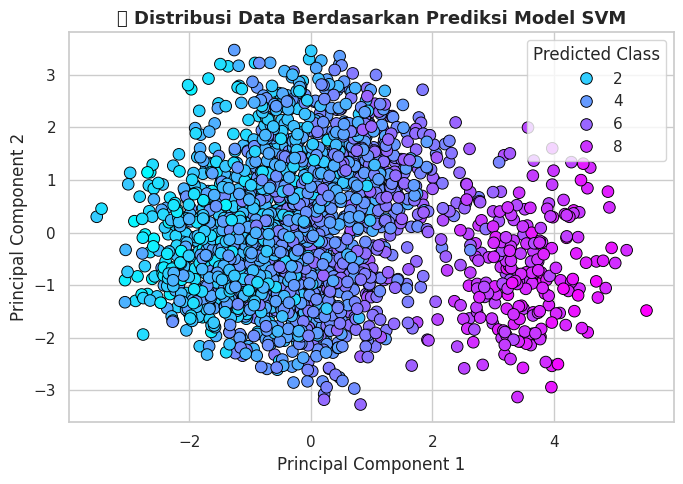

/tmp/ipython-input-4211393507.py:56: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4211393507.py:56: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


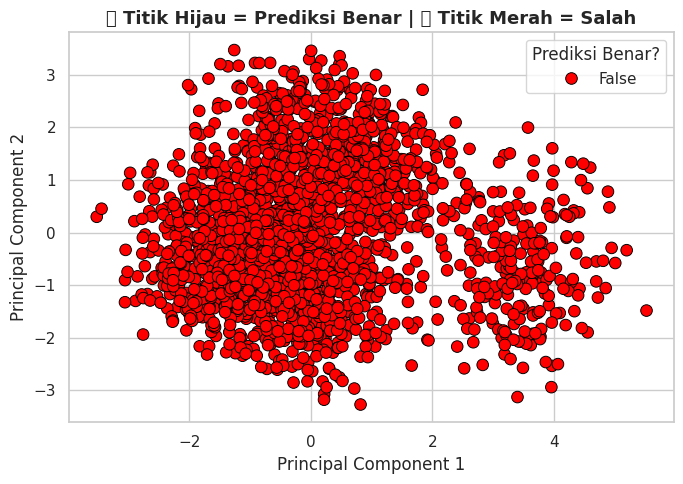

In [30]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Buat DataFrame hasil PCA dan prediksi
df_plot = pd.DataFrame({
    'PC1': X_test_pca[:, 0],
    'PC2': X_test_pca[:, 1],
    'Actual': y_test.values,
    'Predicted': y_pred
})

# ==============================
# 1️⃣ Scatter Plot - Berdasarkan Label Aktual
# ==============================
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='PC1', y='PC2', hue='Actual',
    data=df_plot, palette='viridis', s=70, edgecolor='black'
)
plt.title("🎯 Distribusi Data Berdasarkan Label Aktual", fontsize=13, weight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Actual Class')
plt.tight_layout()
plt.show()

# ==============================
# 2️⃣ Scatter Plot - Berdasarkan Prediksi Model
# ==============================
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='PC1', y='PC2', hue='Predicted',
    data=df_plot, palette='cool', s=70, edgecolor='black'
)
plt.title("🤖 Distribusi Data Berdasarkan Prediksi Model SVM", fontsize=13, weight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Predicted Class')
plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Scatter Plot - Bandingkan Prediksi vs Aktual (warna beda untuk error)
# ==============================
df_plot["Correct"] = df_plot["Actual"] == df_plot["Predicted"]

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='PC1', y='PC2', hue='Correct',
    data=df_plot, palette={True: "green", False: "red"}, s=70, edgecolor='black'
)
plt.title("✅ Titik Hijau = Prediksi Benar | ❌ Titik Merah = Salah", fontsize=13, weight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Prediksi Benar?')
plt.tight_layout()
plt.show()